In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from afinn import Afinn
import datetime
import matplotlib
% matplotlib inline

In [90]:
TW=pd.read_csv('tweets_file.csv',encoding = "ISO-8859-1")

In [91]:
TW.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [92]:
TW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
Unnamed: 0       14940 non-null int64
X                14940 non-null int64
text             14940 non-null object
favorited        14940 non-null bool
favoriteCount    14940 non-null int64
replyToSN        1102 non-null object
created          14940 non-null object
truncated        14940 non-null bool
replyToSID       886 non-null float64
id               14940 non-null float64
replyToUID       1102 non-null float64
statusSource     14940 non-null object
screenName       14940 non-null object
retweetCount     14940 non-null int64
isRetweet        14940 non-null bool
retweeted        14940 non-null bool
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [93]:
temp=TW

In [94]:
def calculate_score(tweet):
    score=afinn.score(tweet)
    return score

In [95]:
#to store the afinn values of the tweets
scores=[]
afinn=Afinn()


In [96]:
#calculating afinn scores of tweets and storing in the scores list
for tweet in range(len(temp.text)):
    scores.append(calculate_score(temp.text[tweet]))

In [101]:
#copying entire scores list for positive and negative afinn scores
Pscore=scores
Nscore=scores
#positive score indices and negative score indices
Pidx=[]
Nidx=[]

In [102]:
#calcualting 5 maximum afinn scores 
for i in range(0,5):
    idx=Pscore.index(np.max(Pscore))
    Pidx.append(idx)
    Pscore.remove(Pscore[idx]) #removing the indices to not repeat the same maximum valued indices
#calcualting 5 minumun afinn scores 
for i in range(0,5):
    idx=Nscore.index(np.min(Nscore))
    Nidx.append(idx)
    Nscore.remove(Nscore[idx]) #removing the indices to not repeat the same minumum valued indices
    

In [103]:
print(Pidx) #printing higest positive score indices
print(Nidx) #printing highest negative score indices

[6629, 7783, 13801, 2365, 12191]
[6938, 3397, 4643, 5818, 5840]


In [104]:
#storing the positive and negative afinn score's indices permanently into a static list.
Pstatic=Pidx
Nstatic=Nidx

In [105]:
TW.created[1]

'2016-11-23 18:40:29'

In [106]:
dto=[datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in temp.created]

In [107]:
dto

[datetime.datetime(2016, 11, 23, 18, 40, 30),
 datetime.datetime(2016, 11, 23, 18, 40, 29),
 datetime.datetime(2016, 11, 23, 18, 40, 3),
 datetime.datetime(2016, 11, 23, 18, 39, 59),
 datetime.datetime(2016, 11, 23, 18, 39, 39),
 datetime.datetime(2016, 11, 23, 18, 39, 11),
 datetime.datetime(2016, 11, 23, 18, 38, 53),
 datetime.datetime(2016, 11, 23, 18, 38, 20),
 datetime.datetime(2016, 11, 23, 18, 38, 9),
 datetime.datetime(2016, 11, 23, 18, 38),
 datetime.datetime(2016, 11, 23, 18, 37, 47),
 datetime.datetime(2016, 11, 23, 18, 37, 25),
 datetime.datetime(2016, 11, 23, 18, 37, 15),
 datetime.datetime(2016, 11, 23, 18, 36, 39),
 datetime.datetime(2016, 11, 23, 18, 36, 37),
 datetime.datetime(2016, 11, 23, 18, 35, 22),
 datetime.datetime(2016, 11, 23, 18, 35, 1),
 datetime.datetime(2016, 11, 23, 18, 34, 57),
 datetime.datetime(2016, 11, 23, 18, 34, 17),
 datetime.datetime(2016, 11, 23, 18, 34, 6),
 datetime.datetime(2016, 11, 23, 18, 34, 2),
 datetime.datetime(2016, 11, 23, 18, 33, 40

In [108]:
df = pd.DataFrame(dto, columns = ['date'])

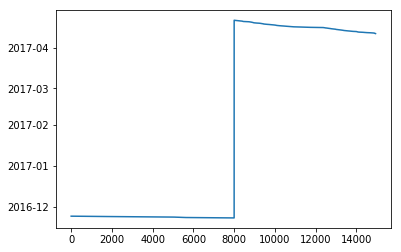

In [109]:
plt.plot(df)

In [110]:
dtt=pd.to_datetime(df['date'])

In [111]:
temp.created

0        2016-11-23 18:40:30
1        2016-11-23 18:40:29
2        2016-11-23 18:40:03
3        2016-11-23 18:39:59
4        2016-11-23 18:39:39
5        2016-11-23 18:39:11
6        2016-11-23 18:38:53
7        2016-11-23 18:38:20
8        2016-11-23 18:38:09
9        2016-11-23 18:38:00
10       2016-11-23 18:37:47
11       2016-11-23 18:37:25
12       2016-11-23 18:37:15
13       2016-11-23 18:36:39
14       2016-11-23 18:36:37
15       2016-11-23 18:35:22
16       2016-11-23 18:35:01
17       2016-11-23 18:34:57
18       2016-11-23 18:34:17
19       2016-11-23 18:34:06
20       2016-11-23 18:34:02
21       2016-11-23 18:33:40
22       2016-11-23 18:33:35
23       2016-11-23 18:33:28
24       2016-11-23 18:33:14
25       2016-11-23 18:33:03
26       2016-11-23 18:32:41
27       2016-11-23 18:32:13
28       2016-11-23 18:32:09
29       2016-11-23 18:31:54
                ...         
14910    2017-04-11 16:58:13
14911    2017-04-11 16:54:35
14912    2017-04-11 16:53:06
14913    2017-

In [112]:
sdates=[]  #list to store date stamp values of created column

In [113]:
for i in range(len(temp.created[:-10])):
    ex=datetime.datetime.strptime(temp.created[i],'%Y-%m-%d %H:%M:%S')
    sdates.append(ex)

In [114]:
ndates=[] #numerical equivalent of dates

In [115]:
for i in range(len(sdates)):
    nex= matplotlib.dates.date2num(sdates[i])
    ndates.append(nex)    

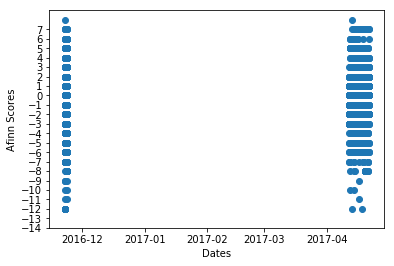

In [119]:
#plotting the afinn scores with Date equivalent numbers
plt.plot_date(ndates,scores)
plt.xlabel('Dates')
plt.ylabel('Afinn Scores')
plt.yticks(list(range(-14,8)))
plt.show()

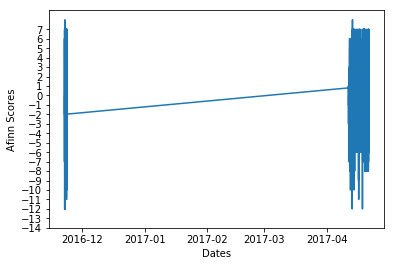

In [120]:
#plotting the Afinn scores with Dates
plt.plot(sdates,scores)
plt.xlabel('Dates')
plt.ylabel('Afinn Scores')
plt.yticks(list(range(-14,8)))
plt.show()

In [124]:
Pstatic

[6629, 7783, 13801, 2365, 12191]

In [125]:
Nstatic

[6938, 3397, 4643, 5818, 5840]

In [126]:
#for referencing columns to access tweeter name
TW

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


In [127]:
print('Top 5 Positive scores are:',scores[6629],' ',scores[7783],' ',scores[13801],' ',scores[2365],' ',scores[12191])

Top 5 Positive scores are: 1.0   3.0   2.0   3.0   4.0


In [128]:
print('Top 5 Negative scores are:',scores[6938],' ',scores[3367],' ',scores[4643],' ',scores[5818],' ',scores[5840])

Top 5 Negative scores are: 0.0   -4.0   0.0   2.0   -2.0


In [138]:
print("*****Top five tweets of Positive influence*****\n")
for i in range(0,5):
    print("Tweet",i+1,'::',TW.text[Pstatic[i]])
    print(" ")

*****Top five tweets of Positive influence*****

Tweet 1 :: #Demonetization won't bring lion's share of d black money from big fishes who own 2/3 of our wealth&amp;hold lacs of crs in foreign banks/gold.
 
Tweet 2 :: RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;
 
Tweet 3 :: RT @jamewils: Amit Annai don't give you crores? Blame it on demonetization <ed><U+00A0><U+00BD><ed><U+00B8><U+009C> https://t.co/Bffif3fbpm
 
Tweet 4 :: Rahul Gandhi says #Demonetization is the biggest scam.

Coalgate : Lol.
2G spectrum : Lmao.
Commonwealth: ROFL.
 
Tweet 5 :: RT @URautelaForever: Dear @evanspiegel 
India is so rich that PM Narendra Modi had to implement demonetization to find out who is actually
 


In [137]:
print("*****Top five tweets of Negative influence*****\n")
for i in range(0,5):
    print("Tweet",i+1,'::',TW.text[Nstatic[i]])
    print(" ")

*****Top five tweets of Negative influence*****

Tweet 1 :: RT @VandanaSsingh: People at airport too facing problem. No cash available for exchange money. They are also out of cash. #Demonetization h
 
Tweet 2 :: Per C-Voter on #Demonetization, approximately:

80% not inconvenienced
25% good idea, poor implementation
5% bad idea, poor implementation
 
Tweet 3 :: A must read piece on #demonetization by @PritishNandy in today's @MumbaiMirror "Fighting corruption? Right"  https://t.co/dQT9w7wKKv
 
Tweet 4 :: RT @ippatel: Retaining all seats of LS and state in Byelection by BJP has proved the people's support on #DeMonetization. It should be abov
 
Tweet 5 :: RT @deep_anchor: India's Modi Didn't Do His Homework https://t.co/RiJENeWX7y
#Demonetization
 
